In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from easyocr import Reader
#pytesseract.get_tesseract_version()

/home/ameer/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


['3', '6', '4', '.', '\x0c']

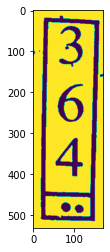

In [3]:
# read image
im = cv2.imread('cropped.png',0)
im = cv2.resize(im, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

if (im.shape[1]>im.shape[0]):
     im = cv2.rotate(im, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)   
        
im = cv2.threshold(im, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]
# remove vertical threshold 

#cv2.floodFill(im, None, (0,0), 255)
#cv2.floodFill(im, None, (0,0), 0)

plt.imshow(im)
# configurations
config = (' --oem 3 --psm 6 outputbase digits')
# pytessercat
text = pytesseract.image_to_string(im, config=config)
# print text
text = text.split('\n')
text

In [4]:

# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(['en'],gpu=True )# flag for using GPU
results = reader.readtext(im, allowlist ='0123456789')
results

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...


[([[54, 36], [126, 36], [126, 142], [54, 142]], '3', 0.9999997615814351),
 ([[56, 174], [130, 174], [130, 300], [56, 300]], '6', 0.999999880790714),
 ([[52, 296], [126, 296], [126, 404], [52, 404]], '4', 0.9999827147277109)]